In [22]:
import pandas as pd
import numpy as np
df = pd.read_csv("../clean_data/merged_data_v3.csv", low_memory=False, index_col=[0])

## Train - Test Split

In [23]:
df.head()

,bbl,total_units_19,year_built,ejectment_count,possession_count,eviction_count,aleration_count,altered_lessthan5yrs,altered_morethan5yrs,classanet_avg,...,boro_3,boro_4,boro_5,rs_share_diff_new,hpd_call_2017_19,hh_inc_avg_19_log1,pop_race_asian_pct_19_log1,pop_race_black_pct_19_log1,pop16_unemp_pct_19_log1,pop_mobile1_diff_state_pct_19_log1
0,1000780047,483,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,4.0,12.276639,0.150551,0.018246,0.035008,0.074674
1,1001350019,4,1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,12.897523,0.096864,0.055298,0.002253,0.014341
2,1001620013,20,1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1.0,2.0,10.973689,0.461379,0.096629,0.037102,0.008935
3,1001630024,16,1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,1.0,10.973689,0.461379,0.096629,0.037102,0.008935
4,1001630033,11,1915,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0.0,0.0,10.973689,0.461379,0.096629,0.037102,0.008935


In [33]:
X = df.drop(['rs_share_diff_new','bbl'], axis = 1)
y = df['rs_share_diff_new']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## Model Selection and Validation - Draft

### 1. Gradient Boosting Classifier

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


In [34]:
# Fit model

gbr_params = {'n_estimators' : [200,225],
            'max_depth'    : [2,4],
             }

model_gb = GradientBoostingClassifier()
gr_gb = GridSearchCV(model_gb, param_grid = gbr_params, cv = 3)
fit_gb = gr_gb.fit(X_train, y_train)
print(fit_gb.best_estimator_)

GradientBoostingClassifier(max_depth=4, n_estimators=200, subsample=0.8)


In [35]:
# Test set prediction

from sklearn import metrics

y_hat_gb_test = fit_gb.predict(X_test)
roc_auc_test_gb = metrics.roc_auc_score(y_test, y_hat_gb_test)
accuracy_test_gb = metrics.accuracy_score(y_test, y_hat_gb_test)
precision_test_gb = metrics.precision_score(y_test, y_hat_gb_test)
recall_test_gb = metrics.recall_score(y_test, y_hat_gb_test)
f1_test_gb = metrics.f1_score(y_test, y_hat_gb_test)

print("Out of sample ROC-AUC: ", roc_auc_test_gb)
print("Out of sample accuracy: ", accuracy_test_gb)
print("Out of sample F1:", f1_test_gb)
print("Out of sample precision:", precision_test_gb)

Out of sample ROC-AUC:  0.7628578041952999
Out of sample accuracy:  0.8280640525559433
Out of sample F1: 0.6875582913635516
Out of sample precision: 0.8742884250474383


### 4. XG Boost

In [13]:
!pip install xgboost
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()

     |████████████████████████████████| 1.8 MB 6.4 MB/s eta 0:00:01


In [14]:
fit_xgb = xgb_classifier.fit(X_train,y_train)
y_hat_xgb_test = fit_gb.predict(X_test)
roc_auc_test_gb = metrics.roc_auc_score(y_test, y_hat_xgb_test)
roc_auc_test_gb

0.7614784925109376

## Feature Importance

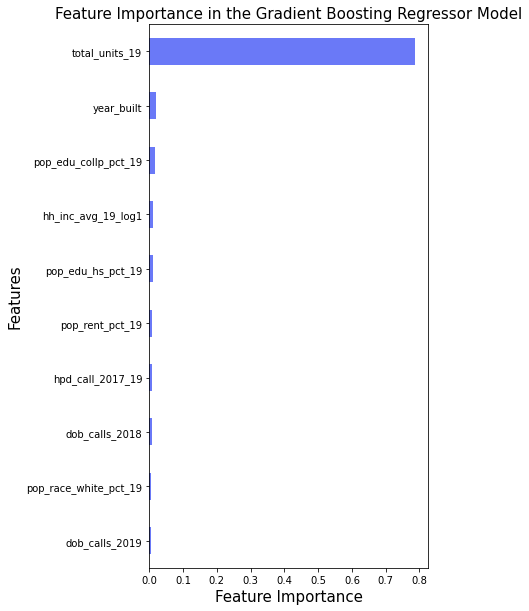

In [32]:
# Get Feature importance data using feature_importances_attribute
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

plt.figure(figsize=(5,10))
importances = pd.Series(fit_gb.best_estimator_.feature_importances_, X_train.columns)
importances.sort_values().tail(10).plot.barh(color = '#6a79f7')
plt.title('Feature Importance in the Gradient Boosting Regressor Model',fontsize=15)
plt.xlabel('Feature Importance',fontsize = 15)
plt.ylabel('Features',fontsize = 15)
plt.show()
